In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
from adjustText import adjust_text

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:

df_DA_US =  df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


In [ ]:
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

<Axes: >

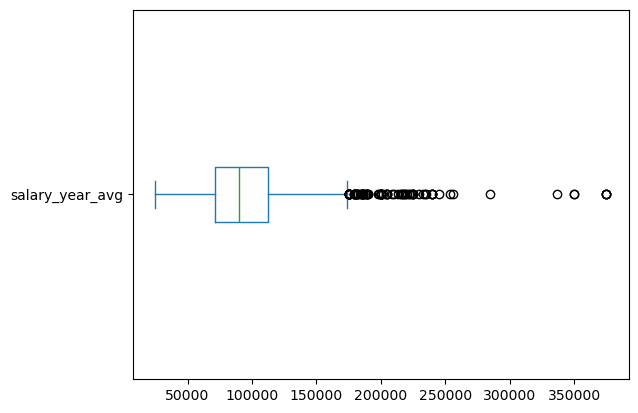

In [15]:
#with pandas we use plot method

df_DA_US['salary_year_avg'].plot(kind = 'box', vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x18788352890>,
 'caps': [<matplotlib.lines.Line2D at 0x18788353cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18788322710>],
 'medians': [<matplotlib.lines.Line2D at 0x18788360f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x18788361950>],
 'means': []}

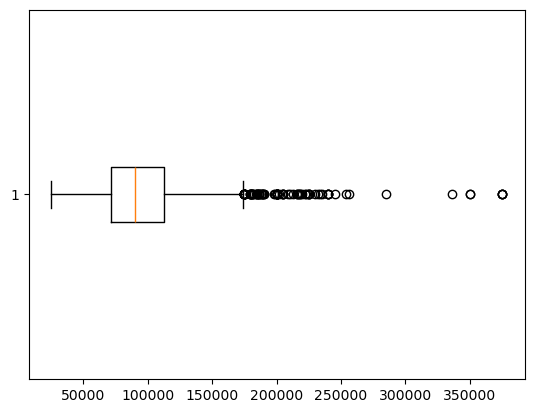

In [20]:
#with matplotlib we use plt() method

plt.boxplot(df_DA_US['salary_year_avg'],  vert = False)

In [21]:
job_list = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US =   df[(df['job_title_short'].isin(job_list)) & (df['job_country'] == 'United States')].copy()

#plt.boxplot(job_list, labels = job_titles, vert = False)

In [26]:
df_US = df_US.dropna(subset = ['salary_year_avg'])

C:\Users\Nora\AppData\Local\Temp\ipykernel_6916\751658212.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_list, labels = job_list, vert = False)


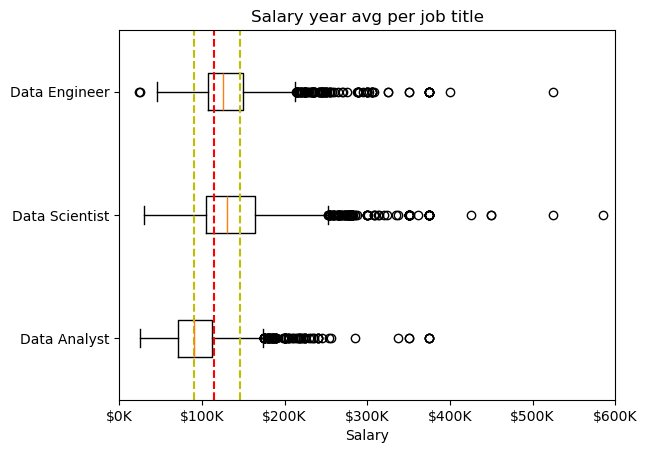

In [37]:
df_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_list]

plt.boxplot(df_list, labels = job_list, vert = False)
plt.title('Salary year avg per job title')
plt.xlabel('Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
ax.axvline(df_US['salary_year_avg'].median(), color='r', linestyle='--')
ax.axvline(df_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax.axvline(df_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
